In [1]:
from ANEMO import ANEMO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lmfit
from lmfit import  Model, Parameters

In [2]:
import pickle
with open('result/param_Fit_AM_fct_velocity_2_step_False_whitening.pkl', 'rb') as fichier :
    param = pickle.load(fichier, encoding='latin1')
with open('../demo/data/enregistrement_AM_2017-10-23_100057.pkl', 'rb') as fichier :
    exp = pickle.load(fichier, encoding='latin1')

In [3]:
Fit = ANEMO.Fit(exp)

In [4]:
def plot(x, bruit, num_plot=0) :

    TargetOn, StimulusOf = 750, 750-300
    np.random.seed(7)
    
    if num_plot==0 :
        num=100
        fig, axs = plt.subplots(5, 2, figsize=(5*2, (5*5)/1.6180))
        
    else :
        num=5
        fig2, axs2 = plt.subplots(num, 1, figsize=(10, num*(10*1/2)/1.6180))
        
    
    for baba in range(num) :
        if baba < 200 :
            block = 0
        elif baba < 400 :
            block = 1
        else :
            block = 2
        trial = baba - 200*block
            
        
        dir_target = exp['p'][trial][block][0]*2-1
        start_anti_true = param['start_anti'][block][trial]+TargetOn
        v_anti_true = param['v_anti'][block][trial]
        latence_true = param['latence'][block][trial]+TargetOn
        tau_true = param['tau'][block][trial]
        maxi_true = param['maxi'][block][trial]

        test = ANEMO.Equation.fct_velocity(x, dir_target, start_anti_true, v_anti_true, latence_true,
                                     tau_true, maxi_true, do_whitening=False)+np.random.rand(len(x))*bruit
        test = test-np.random.rand(len(x))*bruit
        #saccades=[[770, 820, 50]]
        #test[770:820] =  np.arange(0,50,1)*np.nan

        
        old_lat, old_max, old_anti = ANEMO.classical_method.Full(test, TargetOn)
        
        result_deg = Fit.Fit_trial(test, equation='fct_velocity', trackertime=None, TargetOn=TargetOn,
                                   StimulusOf=StimulusOf, saccades=[], dir_target=dir_target,
                                   value_latence=old_lat,
                                   value_maxi=old_max, value_anti=old_anti, before_sacc=5, after_sacc=15)

        if num_plot==0 :
            axs[0][0].set_title('FIT latence')
            axs[1][0].set_title('FIT v_anti')
            axs[2][0].set_title('FIT maxi')
            axs[3][0].set_title('FIT start_anti')
            axs[4][0].set_title('FIT tau')

            axs[0][0].scatter(latence_true, result_deg.values['latence'] , c='k', alpha=0.5)
            axs[1][0].scatter(v_anti_true, result_deg.values['v_anti'] , c='k', alpha=0.5)
            axs[2][0].scatter(maxi_true, result_deg.values['maxi'] , c='k', alpha=0.5)
            
            if abs(v_anti_true) > 3 :
                axs[3][0].scatter(start_anti_true, result_deg.values['start_anti'] , c='k', alpha=0.5)
            else :
                axs[3][0].scatter(start_anti_true, result_deg.values['start_anti'] , c='r', alpha=0.5)
            axs[4][0].scatter(tau_true, result_deg.values['tau'] , c='k', alpha=0.5)
            
            
            
            axs[0][1].set_title('OLD latence')
            axs[1][1].set_title('OLD v_anti')
            axs[2][1].set_title('OLD maxi')


            axs[0][1].scatter(latence_true, old_lat , c='k', alpha=0.5)
            axs[1][1].scatter(v_anti_true, old_anti , c='k', alpha=0.5)
            axs[2][1].scatter(maxi_true, old_max , c='k', alpha=0.5)
            
            for a in range(5) :
                for b in range(2) :
                    axs[a][b].set_xlabel('true')
                axs[a][0].set_ylabel('fit')
                axs[a][1].set_ylabel('old')

            plt.tight_layout() 
        
        else :
            best_fit = ANEMO.Equation.fct_velocity(np.arange(len(test)), dir_target, result_deg.values['start_anti'],
                                       result_deg.values['v_anti'], result_deg.values['latence'],
                                       result_deg.values['tau'], result_deg.values['maxi'], do_whitening=False)

            la = result_deg.values['latence']

            
            axs2[trial].plot(test, c='k', alpha=0.5)
            axs2[trial].plot(best_fit, c='r')
            
            axs2[trial].bar(latence_true, 60, bottom=-30, color='k', width=4)
            axs2[trial].plot(np.ones(len(test))*maxi_true*(dir_target), c='k')
            
            axs2[trial].bar(old_lat, 60, bottom=-30, color='g', width=4)
            axs2[trial].plot(np.ones(len(test))*old_max*(dir_target), c='g')

In [5]:
x = np.arange(0,1400,1)

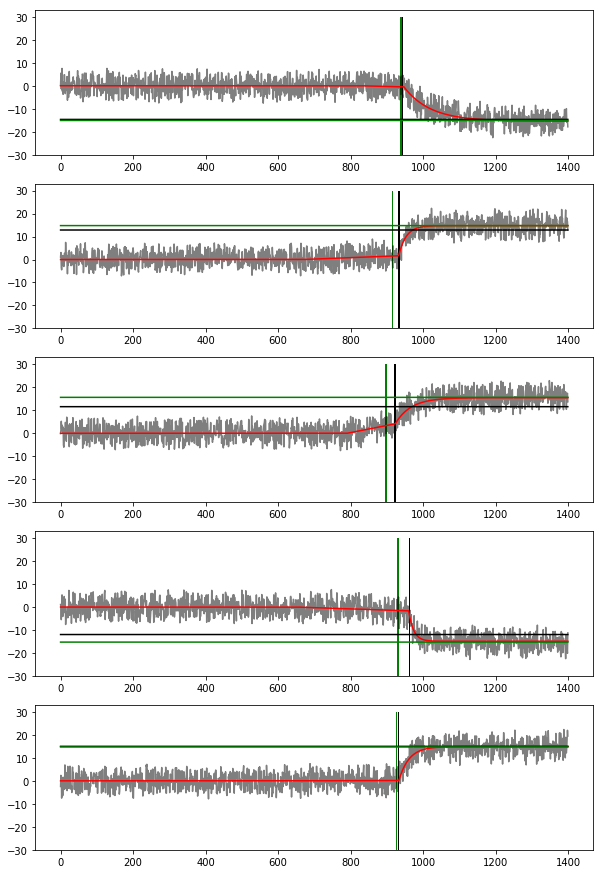

In [6]:
plot(x, bruit=8, num_plot=1)

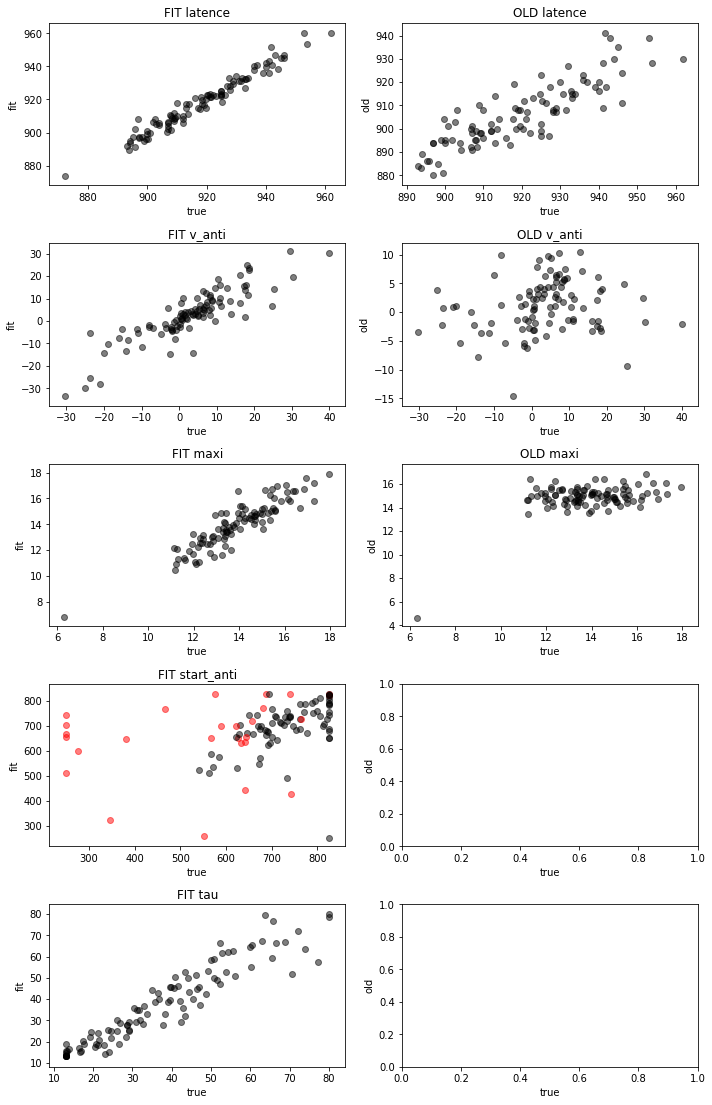

In [7]:
plot(x, bruit=8)